Directions:

In this assignment you will build a neural network.  Specifically, you will build and train a neural network that will attempt to learn to recognize hand-written numeric digits from images.
To do this you will need two files containing image of hand-written number digits.  One file is a training dataset and the other is a test dataset.
The training dataset contains 60,000 gray scale images of hand-written arabic numeric digits (0 through 9). The images are, if arranged in a square, 28 pixels by 28 pixels in size.
The test dataset contain 10,000 gray scale images of hand-written arabic numeric digits (0 through 9). The images are, if arranged in a square, 28 pixels by 28 pixels in size.
You can find these files at the following links

Training dataset:
https://drive.google.com/file/d/12Nd320Hrz-nqfA-oeHgOAjSSKA8l0Z9u/view?usp=share_link

Test:
https://drive.google.com/file/d/12NNmbb0GTrAOO-z8OoVoG_OEgKcH2cr7/view?usp=share_link


1. Find and download the two datasets (identified above).  These dataset must be stored on your Google drive in a subfolder "mnist", that's in folder "data" in your Google drive folder "My Drive".
2. Import any tools that you will need (at least the initial one) into your notebook. More can be imported as needed.
3. Import the datasets from your Google Drive into respective data structures in your notebook.
4. Explore your datasets.  Look at some the data.  How is it organized? This will have a bearing one what you do later.  Look for anomalies.
5. Implement any modifications to the data to deal with the anomalies, if necessary.
6. You may need to convert the type of data structure containing each dataset depending on how you imported your data.
7. Partition your training dataset into a training dataset and a validation dataset.
8. Partition your training dataset into a label dataset and a feature dataset.  Use caution here.  You may want ot scale the features in your training feature dataset.
9. Repeat step 8 for your validation dataset. You may want to scale the features in your validation feature dataset.
10. Repeat step 8 for your test dataset.You may want to scale the features in your test feature dataset.
11. Generate a display (graphic) of a few (3 or 4) of the training data instances.
12. Define a neural network model appropriate to your neural network training problem.
13. Compile your model with the appropriate training parameters.
14. Train  your model using  your training data and your validation data.
15. Display performance statistics produced by the training process.
16. Comment on what step 15 tells you.
17. Run your trained model using the test dataset. Generat and display performance statistics.
18. the last cell of your Colab notebook must provide a narrative describing what you observed through this machine learning process. How well did the model do?  Did it get better as training continued or did it plateau? Would you recommend it for deployment in the "real world"? If so, explain why.  If not, what would  you do to improve the efficacy of your machine learning project?
A link to your completed notebook must be submitted to the assignment in eCampus.

### Google drive auth

In [ ]:
#Google Drive authentication
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Importing data sets and pandas

In [ ]:
#import training data
link = 'https://drive.google.com/file/d/121PYfmIy84kmKrIGLdC5EAyJwJrGsIP6/view?usp=drive_link'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('mnist_train.csv')

trainData = pd.read_csv('mnist_train.csv')
print(trainData)

#import test data set
link = 'https://drive.google.com/file/d/1ur3cGphn5lMsJKWehyPPRi7VqJcp76je/view?usp=drive_link'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('mnist_test.csv')

testData = pd.read_csv('mnist_test.csv')
print(testData)

       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x2

### Implementing any modifications to the data to deal with the anomalies, if necessary:

Replacing all values less than 0 in the dataframe with 0
Replacing all values that isn't a number with 0 (characters)
Replace all empty cells with 0
Replace Na(N) with 0
Replace everything >= 1 with 255 (opacity of gray)

Call on both

In [ ]:
import numpy as np

def anomalyProcessing(data):

    #dont mess with label column
    features = data.drop(columns=['label'])

    #edge cases
    features[features < 0] = 0
    features.fillna(0, inplace=True)
    features[features != 0] = 255

    #put it back
    transformedData = pd.concat([features, data['label']], axis=1)

    return transformedData

trainData = anomalyProcessing(trainData)
testData = anomalyProcessing(testData)

#print(testData)


### 7: Partition your training dataset into a training dataset and a validation dataset.

In [ ]:
#training -> validationData
from sklearn.model_selection import train_test_split

trainData, validationData = train_test_split(trainData, test_size=0.2)
trainData.info()
validationData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48000 entries, 27017 to 50427
Columns: 785 entries, 1x1 to label
dtypes: int64(785)
memory usage: 287.8 MB
<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 58924 to 19547
Columns: 785 entries, 1x1 to label
dtypes: int64(785)
memory usage: 72.0 MB


### 8 and 9: Partition your training dataset into a label dataset and a feature dataset. Use caution here. You may want ot scale the features in your training feature dataset.
Repeat step 8 for your validation dataset. You may want to scale the features in your validation feature dataset.

In [ ]:
#and partitioning into (features and label) from (validation and train)

#label
validationLabel = validationData['label']
trainLabel = trainData['label']
testLabel = testData['label']

#the features
validationData = validationData.drop(['label'], axis = 1)
trainData = trainData.drop(['label'], axis = 1)
testData = testData.drop(['label'], axis = 1)


#print
validationData.info()
trainData.info()

validationLabel.info()
trainLabel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 58924 to 19547
Columns: 784 entries, 1x1 to 28x28
dtypes: int64(784)
memory usage: 71.9 MB
<class 'pandas.core.frame.DataFrame'>
Index: 48000 entries, 27017 to 50427
Columns: 784 entries, 1x1 to 28x28
dtypes: int64(784)
memory usage: 287.5 MB
<class 'pandas.core.series.Series'>
Index: 12000 entries, 58924 to 19547
Series name: label
Non-Null Count  Dtype
--------------  -----
12000 non-null  int64
dtypes: int64(1)
memory usage: 187.5 KB
<class 'pandas.core.series.Series'>
Index: 48000 entries, 27017 to 50427
Series name: label
Non-Null Count  Dtype
--------------  -----
48000 non-null  int64
dtypes: int64(1)
memory usage: 750.0 KB


### 11: Reshaping dataset and printing out images

In [ ]:
#reshape one row
from PIL import Image

#iterate and convert each one to an image
for i in range(100):
  print(validationLabel.iloc[i])
  imageArray = validationData.iloc[i].values.reshape(28,28)
  actualImage = Image.fromarray(imageArray.astype(np.uint8))
  display(actualImage)



3


8


9


3


1


5


9


5


3


5


4


3


2


0


1


1


9


8


6


4


7


2


5


7


0


0


0


2


6


3


7


7


4


4


0


3


2


9


7


7


4


8


7


0


7


5


1


4


9


6


3


4


2


4


7


8


2


5


2


7


0


8


3


9


2


6


4


8


2


3


7


2


8


4


2


2


1


2


0


5


6


9


1


1


9


5


1


7


8


0


0


4


0


0


3


1


4


0


5


6


### 12: Define a neural network model appropriate to your neural network training problem.

13: Compile your model with the appropriate training parameters.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

def createModel():
    model = Sequential()

    # 784 nodes -> 100 nodes, 784 is each pixel and the input layer
    model.add(Dense(100, input_shape=(784,)))

    # Another layer with 100 nodes
    model.add(Dense(units=100))

    # 0-10 outputs
    model.add(Dense(units=10, activation='softmax'))

    # compiling model with appropriate training parameters; discrete version of gradient descent: adam, cross entropy; sgd classifier is an alternative
    model.compile(
        #specifier for minimizing loss
        loss='sparse_categorical_crossentropy',
        optimizer='adam',
        #metrics=['accuracy'],
        #list of metrics to monitor
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )

    return model

# Example usage:
model = createModel()


###Check

In [ ]:
model = createModel()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


###14: Training my model using my training data and my validation data.
15: Display performance statistics produced by the training process.

In [ ]:
print("Fitting model on training data set\n")
#training
#history = model.fit(trainData.all(), batch_size = 1000, epochs = 6, validation_data= (trainLabel.all()))
trainHistory = model.fit(trainData, trainLabel, epochs = 10)
#printing history:
print(trainHistory.history)

print("Fitting model on validation data set\n")
#validation
#history = model.fit(trainData.all(), batch_size = 1000, epochs = 6, validation_data= (trainLabel.all()))
validationHistory = model.fit(validationData, validationLabel, epochs = 10)
print(validationHistory.history)


Fitting model on training data set

Epoch 1/10
1500/1500 [==============================] - 13s 7ms/step - loss: 11.3810 - sparse_categorical_accuracy: 0.8226
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 4.2828 - sparse_categorical_accuracy: 0.8273
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 3.3188 - sparse_categorical_accuracy: 0.8314
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 2.4694 - sparse_categorical_accuracy: 0.8391
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.6801 - sparse_categorical_accuracy: 0.8471
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1261 - sparse_categorical_accuracy: 0.8511
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9681 - sparse_categorical_accuracy: 0.8514
Epoch 8/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.7617 - sparse_categorical_accuracy: 0

###16, observations: Over the epochs for both of the sets, the loss generally continually decreased, while the accuracy continually increased. When the validation data set was being used, the loss increased a little, but kept on decreasing as the epochs increased. The accuracy nearly reached 90%.

###17: Running your trained model using the test dataset. Generating and display performance statistics.

In [ ]:
# model predictions
predictions = model.predict(testData)

# get stats
testLoss, testAccuracy = model.evaluate(testData, testLabel)
print("Loss:", testLoss)
print("Accuracy:", testAccuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.6228 - sparse_categorical_accuracy: 0.8502
Loss: 0.6228386759757996
Accuracy: 0.8501999974250793


313/313 [==============================] - 1s 4ms/step


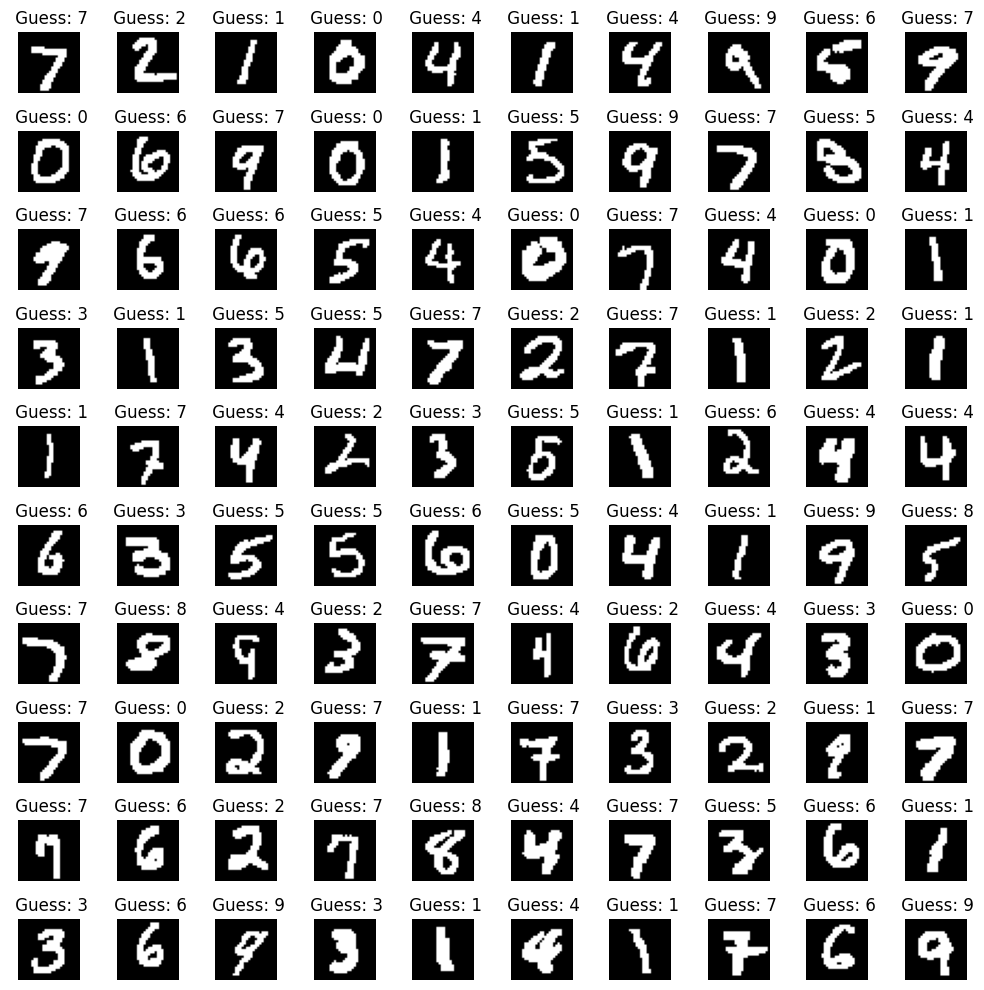

In [ ]:
import matplotlib.pyplot as plt

# get predictions for all test images
predictions = model.predict(testData)

# dimensions
rows = 10
cols = 10
num_images = min(testLabel.size, rows * cols)

# create a new figure
plt.figure(figsize=(10, 10))

# print images with their model's predictions in a grid
for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(testData.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f' Guess: {np.argmax(predictions[i])}')
    plt.axis('off')

plt.tight_layout()
plt.show()

### 18: I observed that the model improved over multiple generations, but it still isn't perfect. for some numbers during earlier tests (not shown). The model did pretty well. It seemed as if the model was starting to plateau around 90%, but since we're limited to the data we're given, this is up for speculation. As for my recommendation, I would have children (or doctors) draw the numbers, to prevent the model from overfitting. To improve the efficacy of the network, I would give it perfect images of the numbers in multiple fonts in another data set, and inform it that those were the ideal numbers. I could also give it more data, or a very large dataset of real pictures with numbers in them (the ReCaptcha strategy).